## Generating synthetic cooling tracks for giant planets

This notebook shows a few examples of how to use the PlanetSynth class to
generate cooling tracks for giant planets.

The two main methods of PlanetSynth are **synthesize** and **predict**:
* **synthesize** calculates the radius, log(luminosity), effective temperature
and surface gravity as they evolve at discrete times between 10 Myr and 10 Gyr.
* **predict** calculates the radius, log(luminosity), effective temperature 
and surface gravity at a specific time (or times).

The primary argument for each method is an array 
of the planetary mass, bulk metallicity, atmospheric metallicity and 
log(stellar incident irradiation), in that order - let's call it planet_params. 

The units are Jupiter mass, mass-fraction for the metallitices and erg/s/cm$^2$ 
for the flux. The shape of planet_params can either be (4,) to calculate the
cooling of a single planet, or (n, 4) for n planets.

The following input ranges are supported:
* Mass: $0.1 < M [M_J] < 30$
* Bulk metallicity: Depending on the mass
  * $0.1 < M [M_J] < 1$ | $0 < Z < 0.8$
  * $1 < M [M_J] < 3$ | $0 < Z < 0.5$
  * $3 < M [M_J] < 5$ | $0 < Z < 0.2$
  * $5 < M [M_J] < 30$ | $0 < Z < 0.04$
* Atmospheric metallicity: $0 < Z_e < min(0.1, Z)$
* Log(Irradiation): $1 < \log F < 9$, $F$ in erg/s/cm$^2$ 

The examples below show how to use the methods. Have fun!



In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from planetsynth import PlanetSynth
mpl.rcParams["lines.linewidth"] = 3.0
mpl.rcParams["font.size"] = 15

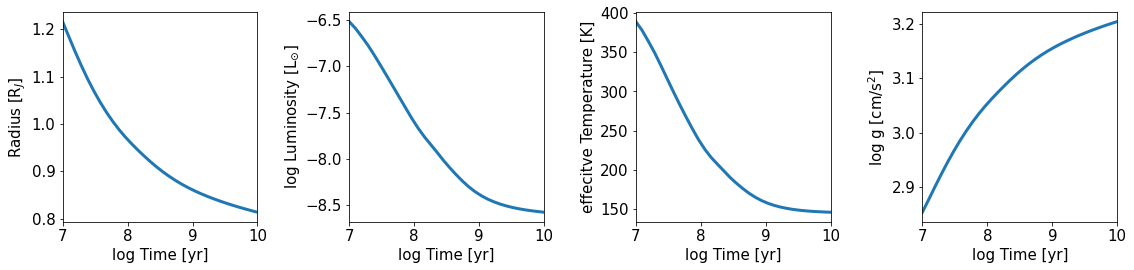

In [10]:
# Simple example of calculating the cooling track for a single planet
# using the synthesize method

# create an instance of the PlanetSynth class
# and define a sample planet
pls = PlanetSynth(verbose=True)
# the verbose parameter tells PlanetSynth to
# be vocal about warnings if something is iffy

M = 0.4  # planetary mass in Jupiter masses
Z = 0.2  # planetary heavy-element mass fraction
Zatm = 0.02
logF = 5  # log(incident stellar irradiation) in erg/s/cm2
planet_params = [M, Z, Zatm, logF]

# synthesize the cooling of the planet along a
# pre-defined time-array between 10 Myr and 10 Gyr
# the result has dimensions (32, 3), and the first, second
# and third columns are radius, log(luminosity) and effective
# temperature, respectively
result = pls.synthesize(planet_params)
radius = result[:, 0]  # radius in Jupiter radius
logL = result[:, 1]  # log(luminosity) in solar luminosity
Teff = result[:, 2]  # effective temperature in K
log_g = result[:, 3]  # log g in cm/s2

# plot the time evolution
logt = pls.log_time  # access the pre-defined time array
fig, ax = plt.subplots(1, 4, figsize=(16, 4), sharex="row")
ax[0].plot(logt, radius)
ax[0].set_xlim(left=7, right=10)
ax[0].set_ylabel("Radius [R$_J$]")
ax[1].plot(logt, logL)
ax[1].set_ylabel("log Luminosity [L$_{\odot}$]")
ax[2].plot(logt, Teff)
ax[2].set_ylabel("effecitve Temperature [K]")
ax[3].plot(logt, log_g)
ax[3].set_ylabel("log g [cm/s$^2$]")
for a in ax:
    a.set_xlabel("log Time [yr]")
fig.tight_layout()
plt.show()


In [11]:
# Simple example of calculating the properties of a planet
# at a specific time using the predict method
logt = 9.5
planet_params = [3, 0.1, 0.02, 7]
result = pls.predict(logt, planet_params)
print(
    f"R = {result[0]:.2f} | log L = {result[1]:.2f}",
    f"| Teff = {result[2]:.2f} | log g = {result[3]:.2f}"
)

R = 1.03 | log L = -6.37 | Teff = 461.14 | log g = 3.87


(20, 50, 4)


Text(0, 0.5, 'log Luminosity [L$_{\\odot}$]')

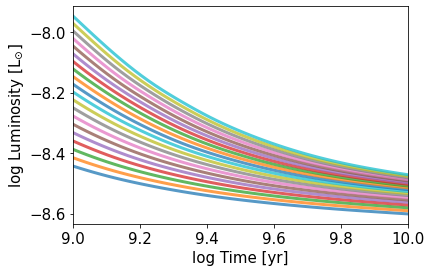

In [12]:
# planet_params can also be a np.ndarray of shape
# (n, 4), where n is the number of planets.

# create a sample of 20 planets with different masses
num_planets = 20
M = np.linspace(0.3, 1, num_planets)
Z = 0.2 * np.ones_like(M)
Z_atm = 0.04 * np.ones_like(M)
logF = 5 * np.ones_like(M)
planet_params = np.array([M, Z, Z_atm, logF]).T  # transpose the array to get the right shape

# predict the cooling tracks for a given time array and plot the luminosity
logt = np.linspace(9, 10)  # define a custom time array
result = pls.predict(logt, planet_params)
print(result.shape)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(logt, result[:, :, 1].T, alpha=0.75)
ax.set_xlim(left=9, right=10)
ax.set_xlabel("log Time [yr]")
ax.set_ylabel("log Luminosity [L$_{\odot}$]")

In [13]:
# it takes a few seconds to calculate a million planets
num_samples = 1_000_000
M = np.random.uniform(0.3, 30, num_samples)
Z = np.random.uniform(0.012, 0.04, num_samples)
Ze = np.random.uniform(0, 0.012, num_samples)
logF = np.random.uniform(1, 7, num_samples)

planet_params = np.array([M, Z, Ze, logF]).T
%timeit pls.synthesize(planet_params)

10.3 s ± 287 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
